# 유통고객 구매패턴 데이터 전처리
## 단계1. 데이터 탐색 및 준비

## 0.미션

### (1) 미션① : 비즈니스 정보 파악
* 예제 질문 9개 조회를 수행해냅니다.


### (2) 미션 ② : 데이터 구조 만들기

* 고객 이탈을 정의하고, 데이터를 생성합니다.
    * 대상 고객
        * 2014 ~ 2016년 신규 가입 고객 이면서,
        * 2016년 하반기에 한번 이상 방문한 고객을 대상 고객으로 정의합니다.
    * Labeling
        * 위 대상 고객 중, 2017년 1~3월(3개월)동안 방문(구매)하지 않은 사람은 이탈로 간주합니다.
    * feature 추가하기
        * 주어진 기본 feature 3가지를 생성합니다.

## 1.환경설정

### (1) 라이브러리 설치하기
아래를 실행해주세요.

In [1]:
!pip install matplotlib
!pip install --upgrade matplotlib

import matplotlib.pyplot as plt

### (2) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [2]:
#[문제1] pandas, numpy, matplotlib 라이브러리를 임포트하세요.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### (3) 데이터 불러오기

* 주어진 데이터셋
    * customers.csv : 고객정보
    * sales.csv : 판매정보
    * products.csv : 상품정보
    
* 다음과 같이 데이터를 저장하세요.
    * 주피터랩 실행
        * 제공된 압축파일 '미프 1차_구매'를 다운받아 압축을 푼다.
        * anaconda의 root directory(보통 C:\Users\<ID> 에 '미프 1차_구매' 폴더를 만들고, 복사하고 붙여넣습니다.
        * '미프 1차_구매' 폴더에 필요한 파일들을 넣고, 본 파일 '데이터 전처리_교육생용' 실습파일을 불러옵니다

* 세부 요구사항
    - 데이터셋을 각각 불러와서 데이터프레임으로 저장합니다.
    - 날짜 데이터들은 날짜형식으로 변환합니다. (customers['RegisterDate'], sales['OrderDate'])
    - 기본 정보를 확인합니다.(.shape, .info(), .head())

In [4]:
#[문제2] '미프 1차_구매' 폴더에서 본 파일들을 열어주세요.

In [5]:
# 전체 데이터 불러오기

# 데이터 3개를 pd.read_csv로 불러오기
customers = pd.read_csv('customers.csv')
sales = pd.read_csv('sales.csv')
products = pd.read_csv('products.csv')

In [6]:
#[문제3] 'customers', 'sales' 데이터의 상단 일부 행을 출력해보세요.

In [7]:
#customers
customers.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2
0,c328222,2014-09-25,F,1960,강원도,원주시
1,c281448,2013-06-18,F,1974,강원도,원주시
2,c038336,2003-10-10,F,1968,강원도,춘천시
3,c084237,2007-03-09,F,1982,강원도,강릉시
4,c162600,2010-06-14,F,1978,강원도,속초시


In [8]:
#sales
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,107,2,2016-01-02,p1036481,2,2100,c150417
1,69,1,2016-01-02,p1152861,1,1091,c212716
2,69,7,2016-01-02,p1013161,1,2600,c212716
3,69,8,2016-01-02,p1005771,1,1650,c212716
4,69,11,2016-01-02,p1089531,1,2600,c212716


In [9]:
#[문제4] 'customers'와 'sales' 데이터프레임의 구조와 기본 통계정보를 출력해보세요.

In [10]:
#customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    2243 non-null   object
 1   RegisterDate  2243 non-null   object
 2   Gender        2243 non-null   object
 3   BirthYear     2243 non-null   int64 
 4   Addr1         2243 non-null   object
 5   Addr2         2243 non-null   object
dtypes: int64(1), object(5)
memory usage: 105.3+ KB


In [11]:
#sales
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70012 entries, 0 to 70011
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     70012 non-null  int64 
 1   Seq         70012 non-null  int64 
 2   OrderDate   70012 non-null  object
 3   ProductID   70012 non-null  object
 4   Qty         70012 non-null  int64 
 5   Amt         70012 non-null  int64 
 6   CustomerID  70012 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.7+ MB


In [12]:
#[문제5] 날짜 데이터를 날짜형식으로 변환해주세요. 날짜데이터 : customers['RegisterDate'], sales['OrderDate']

In [13]:
# pd.to_datetime 활용
customers['RegisterDate'] = pd.to_datetime(customers['RegisterDate'])
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])

In [14]:
#[문제6] 'customers'의 데이터타입이 날짜형식으로 잘 변환되었는지 확인해주세요.


In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    2243 non-null   object        
 1   RegisterDate  2243 non-null   datetime64[ns]
 2   Gender        2243 non-null   object        
 3   BirthYear     2243 non-null   int64         
 4   Addr1         2243 non-null   object        
 5   Addr2         2243 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 105.3+ KB


In [16]:
#[문제7] 'sales'의 데이터타입이 날짜형식으로 변환되었는지 확인해주세요.

In [17]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70012 entries, 0 to 70011
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     70012 non-null  int64         
 1   Seq         70012 non-null  int64         
 2   OrderDate   70012 non-null  datetime64[ns]
 3   ProductID   70012 non-null  object        
 4   Qty         70012 non-null  int64         
 5   Amt         70012 non-null  int64         
 6   CustomerID  70012 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.7+ MB


In [18]:
#[문제8] 'sales' 데이터의 'OrderDate'의 최소값과 최대값을 표시해주세요.

In [19]:
# 가장 오래된 주문 일자
sales['OrderDate'].min()

Timestamp('2016-01-02 00:00:00')

In [20]:
# 가장 최근 주문 일자
sales['OrderDate'].max()

Timestamp('2017-03-31 00:00:00')

## 2.데이터 탐색

주어진 데이터에 대해서 다음의 요건에 맞게 조회하면서 데이터를 파악해 봅시다.

* **상세요구사항**
    * 아래 예제 질문 9개에 대해 조회를 수행합니다.
    * 예제 질문
        * Q01) 일별 매출액
        * Q02) 월별 매출액
        * Q03) 요일별 매출액 평균
        * Q04) 일별 고객 1인당 평균 구매액(객단가)
        * Q05) 일별 방문 고객수(구매 고객수)
        * Q06) 매출 상위 top 10 상품
        * Q07) 요일별 매출상위 Top 10 상품
        * Q08) 카테고리별 매출 비중
        * Q09) 고객 나이대

### Q01) 일별 매출액

In [21]:
#[문제9] 'sales' 데이터프레임에서 일별 매출액의 합계를 'daily_sales' 데이터 프레임에 할당하세요.

In [22]:
# 'sales'에서 주문일자별 주문 금액 합산 : groupby
daily_sales = sales.groupby('OrderDate', as_index = False)['Amt'].sum()

daily_sales

,OrderDate,Amt
0,2016-01-02,503234
1,2016-01-03,211202
2,2016-01-04,705195
3,2016-01-05,502803
4,2016-01-06,485984
...,...,...
442,2017-03-27,465265
443,2017-03-28,529778
444,2017-03-29,451900
445,2017-03-30,425932


In [23]:
#[문제10] 'sales' 데이터프레임에서 부분인 2016년 1월~3월까지 3개월의 범위로 데이터를 선택하고 'daily_sales'에 할당하세요.

In [24]:
# loc 함수 활용 
daily_sales = sales.loc[(sales['OrderDate'].dt.year == 2016) & (sales['OrderDate'].dt.month <= 3),:]

In [25]:
#[문제11] 일자별 매출액을 'daily_sales' 데이터 프레임에 저장해주세요.

In [26]:
#'OrderDate' 기준 'Amt'의 합계 계산
daily_sales = daily_sales.groupby('OrderDate', as_index = False)['Amt'].sum()

daily_sales

,OrderDate,Amt
0,2016-01-02,503234
1,2016-01-03,211202
2,2016-01-04,705195
3,2016-01-05,502803
4,2016-01-06,485984
...,...,...
83,2016-03-27,373716
84,2016-03-28,711169
85,2016-03-29,422533
86,2016-03-30,619654


In [27]:
#[문제12] 'daily_sales' 데이터를 확인해보세요.

In [28]:
daily_sales

,OrderDate,Amt
0,2016-01-02,503234
1,2016-01-03,211202
2,2016-01-04,705195
3,2016-01-05,502803
4,2016-01-06,485984
...,...,...
83,2016-03-27,373716
84,2016-03-28,711169
85,2016-03-29,422533
86,2016-03-30,619654


### Q02) 월별 매출액

In [29]:
#[문제13] 기간별 조회를 위해 'sales' 데이터프레임에 주문일자의 연도와 월의 변수를 추가해주세요.

In [30]:
# 연도는 'Year', 월은 'Month'로 변수를 추가
# 'OrderDate' 컬럼에서 dt.year, dt.month 함수 활용

sales['Year'] = sales['OrderDate'].dt.year
sales

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016
1,69,1,2016-01-02,p1152861,1,1091,c212716,2016
2,69,7,2016-01-02,p1013161,1,2600,c212716,2016
3,69,8,2016-01-02,p1005771,1,1650,c212716,2016
4,69,11,2016-01-02,p1089531,1,2600,c212716,2016
...,...,...,...,...,...,...,...,...
70007,53,4,2017-03-31,p1072601,1,4600,c337999,2017
70008,53,6,2017-03-31,p1178011,1,8800,c337999,2017
70009,55,6,2017-03-31,p1054261,1,2091,c088320,2017
70010,59,4,2017-03-31,p1175481,1,1300,c238056,2017


In [31]:
sales['Month'] = sales['OrderDate'].dt.month
sales

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1
1,69,1,2016-01-02,p1152861,1,1091,c212716,2016,1
2,69,7,2016-01-02,p1013161,1,2600,c212716,2016,1
3,69,8,2016-01-02,p1005771,1,1650,c212716,2016,1
4,69,11,2016-01-02,p1089531,1,2600,c212716,2016,1
...,...,...,...,...,...,...,...,...,...
70007,53,4,2017-03-31,p1072601,1,4600,c337999,2017,3
70008,53,6,2017-03-31,p1178011,1,8800,c337999,2017,3
70009,55,6,2017-03-31,p1054261,1,2091,c088320,2017,3
70010,59,4,2017-03-31,p1175481,1,1300,c238056,2017,3


In [32]:
#[문제14] 월별 매출액의 합계를 구하고 'monthly_sales'에 저장해주세요.

In [33]:
# groupby 함수 활용, as_index = False
monthly_sales = sales.groupby(['Year', 'Month'], as_index = False)['Amt'].sum()

In [34]:
#[문제15] 'monthly_sales'를 출력하고 확인해주세요.

In [35]:
monthly_sales

,Year,Month,Amt
0,2016,1,14209990
1,2016,2,14367451
2,2016,3,17111120
3,2016,4,15129917
4,2016,5,13976941
5,2016,6,13113610
6,2016,7,10717743
7,2016,8,10176702
8,2016,9,10496653
9,2016,10,10003648


### Q03) 요일별 매출액 평균

In [36]:
#[문제16] 'sales' 데이터프레임에서 주문일자 기준 일별 매출액의 합계를 구해 'day_sales'에 저장하세요.


In [37]:
# groupby 함수 활용, 'OrderDate' 기준 'Amt'의 합산
# sum 함수 활용

day_sales = sales.groupby('OrderDate', as_index = False)['Amt'].sum()

In [38]:
#[문제17] 'day_sales'에서 'OrderDate' 열의 날짜 정보를 활용하여 'Weekday' 열을 추가하세요.

In [39]:
# dt.day_name() 함수 
day_sales['Weekday'] = day_sales['OrderDate'].dt.day_name()

In [40]:
#[문제18] day_sales 데이터프레임의 'Weekday' 열을 출력하세요.

In [41]:
day_sales

,OrderDate,Amt,Weekday
0,2016-01-02,503234,Saturday
1,2016-01-03,211202,Sunday
2,2016-01-04,705195,Monday
3,2016-01-05,502803,Tuesday
4,2016-01-06,485984,Wednesday
...,...,...,...
442,2017-03-27,465265,Monday
443,2017-03-28,529778,Tuesday
444,2017-03-29,451900,Wednesday
445,2017-03-30,425932,Thursday


### Q04) 일별 고객 1인당 평균 구매액(객단가)

In [42]:
#[문제19] 'sales' 데이터프레임에서 주문일자,고객ID별 주문금액을 합산하여 'order_amt'에 저장하세요.


In [43]:
# 'OrderDate'와 'CustomerID' 기준 groupby 함수 활용
# sum 함수 활용

order_amt = sales.groupby(['OrderDate', 'CustomerID'], as_index = False)['Amt'].sum()

In [44]:
#[문제20] 'order_amt'의 상단 10행을 출력하세요.


In [45]:
# head 함수
order_amt.head()

,OrderDate,CustomerID,Amt
0,2016-01-02,c029643,2650
1,2016-01-02,c047907,1650
2,2016-01-02,c068640,3300
3,2016-01-02,c082866,12350
4,2016-01-02,c083862,9504


In [46]:
#[문제21] 'order_amt'에서 주문일자별 고객 구매액의 총 평균을 구하고 'order_amt2'에 저장하세요.



In [47]:
# 'OrderDate'기준 groupby 함수 활용
# mean 함수 활용

order_amt2 = order_amt.groupby('OrderDate', as_index = False)['Amt'].mean()

In [48]:
order_amt2

,OrderDate,Amt
0,2016-01-02,7624.757576
1,2016-01-03,5415.435897
2,2016-01-04,6716.142857
3,2016-01-05,6364.594937
4,2016-01-06,6844.845070
...,...,...
442,2017-03-27,5410.058140
443,2017-03-28,6160.209302
444,2017-03-29,5868.831169
445,2017-03-30,5679.093333


### Q05) 일별 방문 고객수(구매 고객수)

In [49]:
#[문제22] 'order_amt'에서 일별 방문 고객수를 구하고 'daily_visit'으로 저장해주세요.


In [50]:
order_amt

,OrderDate,CustomerID,Amt
0,2016-01-02,c029643,2650
1,2016-01-02,c047907,1650
2,2016-01-02,c068640,3300
3,2016-01-02,c082866,12350
4,2016-01-02,c083862,9504
...,...,...,...
32649,2017-03-31,c385994,10700
32650,2017-03-31,c394131,4150
32651,2017-03-31,c397789,4250
32652,2017-03-31,c399578,10700


# 강사님 풀이
daily_visit = sales.groupby(['OrderDate'], as_index=False)['CustomerID'].count()

daily_visit

In [51]:
# CustomerID 컬럼의 데이터 개수 계산
daily_visit = order_amt.groupby('OrderDate', as_index = False)['CustomerID'].count()

daily_visit

,OrderDate,CustomerID
0,2016-01-02,66
1,2016-01-03,39
2,2016-01-04,105
3,2016-01-05,79
4,2016-01-06,71
...,...,...
442,2017-03-27,86
443,2017-03-28,86
444,2017-03-29,77
445,2017-03-30,75


In [52]:
#[문제23] 'order_amt2'에 'daily_visit' 컬럼을 주문일자 기준 추가해주세요.

수혁 -
ortder_amt2['daily_visit'] = daily_visit['daily_visit']

In [53]:
order_amt2['daily_visit'] = daily_visit['CustomerID']

In [54]:
# order_amt2 = pd.merge(order_amt2, daily_visit, on = 'OrderDate', how = 'outer')
# order_amt2 = order_amt2.rename(columns = {'CustomerID' : 'daily_visit'})

In [55]:
#[문제24] 'order_amt2' 데이터를 확인해보세요.

In [56]:
order_amt2

,OrderDate,Amt,daily_visit
0,2016-01-02,7624.757576,66
1,2016-01-03,5415.435897,39
2,2016-01-04,6716.142857,105
3,2016-01-05,6364.594937,79
4,2016-01-06,6844.845070,71
...,...,...,...
442,2017-03-27,5410.058140,86
443,2017-03-28,6160.209302,86
444,2017-03-29,5868.831169,77
445,2017-03-30,5679.093333,75


### Q06) 매출 상위 top 10 상품

In [57]:
#[문제25] 'sales' 데이터와 'products' 데이터를 합쳐서 'top_amt'에 할당하세요.

In [58]:
# merge 함수 활용
top_amt = pd.merge(sales, products, how = 'outer')

In [59]:
top_amt

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,ProductName,Category,SubCategory
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,순두부,반찬류,두부
1,137,4,2016-01-02,p1036481,2,2100,c280590,2016,1,순두부,반찬류,두부
2,63,16,2016-01-03,p1036481,1,1050,c037915,2016,1,순두부,반찬류,두부
3,135,3,2016-01-04,p1036481,3,3150,c100815,2016,1,순두부,반찬류,두부
4,63,13,2016-01-06,p1036481,10,10500,c048405,2016,1,순두부,반찬류,두부
...,...,...,...,...,...,...,...,...,...,...,...,...
70007,89,1,2017-03-31,p1299491,1,2150,c397789,2017,3,당근,채소,뿌리채소
70008,69,5,2017-03-31,p1299491,1,2150,c268330,2017,3,당근,채소,뿌리채소
70009,121,4,2017-03-31,p1299491,1,2150,c222461,2017,3,당근,채소,뿌리채소
70010,159,9,2017-03-31,p1299491,1,2150,c275305,2017,3,당근,채소,뿌리채소


In [60]:
#[문제26] 상품명을 기준으로 매출 합계를 구하여 'top_amt2'에 저장하세요


In [61]:
# groupby 함수 활용, sum함수 활용
top_amt2 = top_amt.groupby('ProductName', as_index = False)['Amt'].sum()

top_amt2

,ProductName,Amt
0,감귤컵푸딩,677154
1,감자칩,3676518
2,고구마스틱,1620986
3,깻잎,2930359
4,낱개캔디,479197
5,느타리버섯,4163035
6,당근,4453387
7,두부_대,10119037
8,두부_소,7319963
9,딸기_대,11011541


In [62]:
#[문제27] 'top_amt2' 데이터프레임을 'Amt'열 기준 상위 10개의 데이터를 선택하여 내림차순으로 정렬하고 'top10_amt'에 저장하세요.

In [63]:
# sort_values 함수 활용
top10_amt = top_amt2.sort_values(by = 'Amt', ascending = False)

In [64]:
#[문제28] 'top10_amt' 데이터프레임을 확인하세요.

In [65]:
top10_amt.head()

,ProductName,Amt
37,우유1000,18129067
23,사과_소,14078818
9,딸기_대,11011541
7,두부_대,10119037
10,딸기_소,7517664


### Q07) 카테고리별 매출 비중

In [66]:
#[문제29] 'sales'와 'products' 데이터프레임을 합치고 'cate_amt'에 저장하세요.

In [67]:
# merge 함수
cate_amt = pd.merge(sales, products, how = 'outer')

cate_amt

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,ProductName,Category,SubCategory
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,순두부,반찬류,두부
1,137,4,2016-01-02,p1036481,2,2100,c280590,2016,1,순두부,반찬류,두부
2,63,16,2016-01-03,p1036481,1,1050,c037915,2016,1,순두부,반찬류,두부
3,135,3,2016-01-04,p1036481,3,3150,c100815,2016,1,순두부,반찬류,두부
4,63,13,2016-01-06,p1036481,10,10500,c048405,2016,1,순두부,반찬류,두부
...,...,...,...,...,...,...,...,...,...,...,...,...
70007,89,1,2017-03-31,p1299491,1,2150,c397789,2017,3,당근,채소,뿌리채소
70008,69,5,2017-03-31,p1299491,1,2150,c268330,2017,3,당근,채소,뿌리채소
70009,121,4,2017-03-31,p1299491,1,2150,c222461,2017,3,당근,채소,뿌리채소
70010,159,9,2017-03-31,p1299491,1,2150,c275305,2017,3,당근,채소,뿌리채소


In [68]:
#[문제30] 카테고리를 기준으로 매출 합계를 구하여 'cate_amt2'에 저장하세요.

In [69]:
# groupby, sum 함수 활용
cate_amt2 = cate_amt.groupby('Category', as_index = False)['Amt'].sum()

cate_amt2

,Category,Amt
0,간식,12920570
1,과일,49789339
2,반찬류,32204820
3,유제품,45261956
4,채소,54822783


In [70]:
#[문제31] 카테고리별 매출 비중을 구하여 'Rate' 변수를 'cate_amt2'에 추가해주세요. 

In [71]:
# 매출 비중 : 'Amt' / Amt.sum()
cate_amt2['Rate'] = cate_amt2['Amt'] / cate_amt2['Amt'].sum()

In [72]:
# 'cate_amt2'를 출력하세요.

In [73]:
cate_amt2

,Category,Amt,Rate
0,간식,12920570,0.066260
1,과일,49789339,0.255331
2,반찬류,32204820,0.165153
3,유제품,45261956,0.232113
4,채소,54822783,0.281143


### Q08) 요일별 매출 비중

In [74]:
#[문제32] 'sales'와 'products' 데이터프레임을 합치고 'day_amt'에 저장하세요.

In [75]:
day_amt = pd.merge(sales, products, how = 'outer')

day_amt

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,ProductName,Category,SubCategory
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,순두부,반찬류,두부
1,137,4,2016-01-02,p1036481,2,2100,c280590,2016,1,순두부,반찬류,두부
2,63,16,2016-01-03,p1036481,1,1050,c037915,2016,1,순두부,반찬류,두부
3,135,3,2016-01-04,p1036481,3,3150,c100815,2016,1,순두부,반찬류,두부
4,63,13,2016-01-06,p1036481,10,10500,c048405,2016,1,순두부,반찬류,두부
...,...,...,...,...,...,...,...,...,...,...,...,...
70007,89,1,2017-03-31,p1299491,1,2150,c397789,2017,3,당근,채소,뿌리채소
70008,69,5,2017-03-31,p1299491,1,2150,c268330,2017,3,당근,채소,뿌리채소
70009,121,4,2017-03-31,p1299491,1,2150,c222461,2017,3,당근,채소,뿌리채소
70010,159,9,2017-03-31,p1299491,1,2150,c275305,2017,3,당근,채소,뿌리채소


In [76]:
#[문제33] 'day_amt' 데이터에서 'OrderDate' 열을 날짜 형식의 데이터타입으로 변환해주세요

In [77]:
# pd.to_datetime 함수 활용
day_amt['OrderDate'] = pd.to_datetime(day_amt['OrderDate'])



In [78]:
day_amt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70012 entries, 0 to 70011
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      70012 non-null  int64         
 1   Seq          70012 non-null  int64         
 2   OrderDate    70012 non-null  datetime64[ns]
 3   ProductID    70012 non-null  object        
 4   Qty          70012 non-null  int64         
 5   Amt          70012 non-null  int64         
 6   CustomerID   70012 non-null  object        
 7   Year         70012 non-null  int64         
 8   Month        70012 non-null  int64         
 9   ProductName  70012 non-null  object        
 10  Category     70012 non-null  object        
 11  SubCategory  70012 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 6.9+ MB


In [79]:
#[문제34] 'day_amt' 데이터에서 'OrderDate' 열의 날짜 정보를 활용하여 요일을 나타내는 'Weekday' 열을 추가하고 확인해주세요.

In [80]:
# dt.day_name() 함수 활용 
day_amt['Weekday'] = day_amt['OrderDate'].dt.day_name()

day_amt

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,ProductName,Category,SubCategory,Weekday
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,순두부,반찬류,두부,Saturday
1,137,4,2016-01-02,p1036481,2,2100,c280590,2016,1,순두부,반찬류,두부,Saturday
2,63,16,2016-01-03,p1036481,1,1050,c037915,2016,1,순두부,반찬류,두부,Sunday
3,135,3,2016-01-04,p1036481,3,3150,c100815,2016,1,순두부,반찬류,두부,Monday
4,63,13,2016-01-06,p1036481,10,10500,c048405,2016,1,순두부,반찬류,두부,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70007,89,1,2017-03-31,p1299491,1,2150,c397789,2017,3,당근,채소,뿌리채소,Friday
70008,69,5,2017-03-31,p1299491,1,2150,c268330,2017,3,당근,채소,뿌리채소,Friday
70009,121,4,2017-03-31,p1299491,1,2150,c222461,2017,3,당근,채소,뿌리채소,Friday
70010,159,9,2017-03-31,p1299491,1,2150,c275305,2017,3,당근,채소,뿌리채소,Friday


In [81]:
#[문제35] day_amt를 요일 기준 매출액의 합을 계산하고 day_amt2에 저장하세요.


In [82]:
# groupby, sum 함수 활용
day_amt2 = day_amt.groupby('Weekday', as_index = False)['Amt'].sum()

In [83]:
#[문제36] day_amt2를 출력하세요.
day_amt2

,Weekday,Amt
0,Friday,30838811
1,Monday,34484281
2,Saturday,28683620
3,Sunday,18358536
4,Thursday,26608397
5,Tuesday,28097823
6,Wednesday,27928000


In [84]:
#[문제37] 요일별 매출 비중을 구하여 'Rate' 변수를 'day_amt2'에 추가해주세요.

In [85]:
day_amt2['Rate'] = day_amt2['Amt'] / day_amt2['Amt'].sum()

In [86]:
#[문제38] day_amt2를 다시 출력하여 변수가 추가되었는지 확인해주세요.
day_amt2

,Weekday,Amt,Rate
0,Friday,30838811,0.158148
1,Monday,34484281,0.176843
2,Saturday,28683620,0.147096
3,Sunday,18358536,0.094147
4,Thursday,26608397,0.136454
5,Tuesday,28097823,0.144092
6,Wednesday,27928000,0.143221


### Q09) 고객 나이대

In [87]:
#[문제39] 고객의 태어난 연도를 활용하여 'Age'(고객 나이) 컬럼을 추가 합니다. (현재 : 2016년)

In [88]:
# 2016년 - 고객의 태어난 연도
customers['Age'] = 2016 - customers['BirthYear']

customers

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age
0,c328222,2014-09-25,F,1960,강원도,원주시,56
1,c281448,2013-06-18,F,1974,강원도,원주시,42
2,c038336,2003-10-10,F,1968,강원도,춘천시,48
3,c084237,2007-03-09,F,1982,강원도,강릉시,34
4,c162600,2010-06-14,F,1978,강원도,속초시,38
...,...,...,...,...,...,...,...
2238,c302101,2013-11-23,F,1981,충청북도,청원군,35
2239,c213699,2011-11-04,F,1967,충청북도,청주시,49
2240,c314668,2014-04-25,F,1977,충청북도,청주시,39
2241,c160301,2010-05-15,F,1953,충청북도,청주시,63


In [89]:
#[문제40] 고객이 몇십대 인지 'Age' 컬럼을 활용하여 'AgeGroup'(연령대) 컬럼을 추가 합니다.

In [90]:
# 연령대 = 나이 / 10 * 10
customers['AgeGroup'] = customers['Age'] // 10 * 10

In [91]:
#[문제41] 'customers' 데이터의 상단 5행을 출력하세요.

In [92]:
customers.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50
1,c281448,2013-06-18,F,1974,강원도,원주시,42,40
2,c038336,2003-10-10,F,1968,강원도,춘천시,48,40
3,c084237,2007-03-09,F,1982,강원도,강릉시,34,30
4,c162600,2010-06-14,F,1978,강원도,속초시,38,30


In [93]:
#[추가문제42] 고객의 성별과 구매년도에 대한 가변수를 만들고 'encoded_data'에 저장하세요.

In [94]:
customers.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50
1,c281448,2013-06-18,F,1974,강원도,원주시,42,40
2,c038336,2003-10-10,F,1968,강원도,춘천시,48,40
3,c084237,2007-03-09,F,1982,강원도,강릉시,34,30
4,c162600,2010-06-14,F,1978,강원도,속초시,38,30


In [95]:
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1
1,69,1,2016-01-02,p1152861,1,1091,c212716,2016,1
2,69,7,2016-01-02,p1013161,1,2600,c212716,2016,1
3,69,8,2016-01-02,p1005771,1,1650,c212716,2016,1
4,69,11,2016-01-02,p1089531,1,2600,c212716,2016,1


In [96]:
# customers, Sales 데이터프레임을 CustomerID 컬럼 기준 병합, 'merged_data'에 할당
merged_data = pd.merge(customers, sales, on = 'CustomerID', how = 'outer')

merged_data

# Gender, Year 컬럼 기반 가변수화된 데이터프레임 'encoded_data' 생성(각 범주에 해당하면 1, 아니면 0)

encoded_data = pd.get_dummies(merged_data, columns = ['Gender', 'Year'], drop_first = False)
# encoded_data = pd.get_dummies(merged_data, columns = column2, drop_first = False)

encoded_data

,CustomerID,RegisterDate,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Month,Gender_F,Gender_M,Year_2016,Year_2017
0,c328222,2014-09-25,1960,강원도,원주시,56,50,155,1,2016-02-24,p1001771,1,3300,2,1,0,1,0
1,c328222,2014-09-25,1960,강원도,원주시,56,50,143,5,2016-03-03,p1191881,1,1750,3,1,0,1,0
2,c328222,2014-09-25,1960,강원도,원주시,56,50,143,8,2016-03-03,p1005621,1,2900,3,1,0,1,0
3,c328222,2014-09-25,1960,강원도,원주시,56,50,143,10,2016-03-03,p1133371,2,2000,3,1,0,1,0
4,c328222,2014-09-25,1960,강원도,원주시,56,50,143,11,2016-03-03,p1005891,1,1950,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70007,c181797,2011-01-26,1981,경기도,화성시,35,30,73,1,2016-06-23,p1207951,1,2800,6,1,0,1,0
70008,c181797,2011-01-26,1981,경기도,화성시,35,30,73,2,2016-06-23,p1012751,1,1250,6,1,0,1,0
70009,c181797,2011-01-26,1981,경기도,화성시,35,30,73,5,2016-06-23,p1133371,1,800,6,1,0,1,0
70010,c181797,2011-01-26,1981,경기도,화성시,35,30,73,7,2016-06-23,p1119071,1,1091,6,1,0,1,0


## 3.고객 이탈 정의

### (1) Label 만들기

* **Label이란?**
    * 라벨링이란 데이터의 의미 있는 값을 부여하여 구분하거나 분류하는 작업입니다.
    * 라벨링을 통해 데이터를 분석하거나 모델링하는 과정을 더 의미있게 만듭니다.
    * 예를 들면 이메일이 '스팸'인지 '정상'인지를 분류하거나, 데이터를 그룹화하거나 참인지 거짓인지 이진 분류하거나,
      순서를 표현하거나, 카테고리화하는 등 데이터의 특성에 따라 라벨링을 적용합니다.
* **Target이란?**
    * 타겟은 데이터 분석에서 예측하거나 분류하고자 하는 대상을 말합니다. 즉 우리가 예측하려는 값입니다.
    * 즉 타겟은 예측하거나 분류하려는 대상이나 범주이며, 타겟변수는 그 값을 의미합니다. 
    * 라벨과 타겟은 비슷한 개념이지만 라벨은 데이터의 특성이나 카테고리를 설명하기 위해 나타내는 값이며, 
      타겟은 모델이 예측하려는 대상 결과값이라고 이해해주세요.
* **세부 요구사항**
    * 고객의 이탈여부에 해당하는 Target변수를 생성하시오.
    * 대상 고객
        * 2014 ~ 2016년 신규 가입 고객 이면서,
        * 2016년 하반기에 한번 이상 방문한 고객이 대상 고객입니다.
    * Labeling
        * 위 대상 고객 중, 2017년 1~3월(3개월)동안 방문(구매)하지 않은 사람은 이탈로 간주합니다.
        * 이탈고객은 1, 이탈하지 않은 고객은 0으로 정의

#### 1) 대상고객 만들기

In [97]:
#[문제43] 'customers' 데이터에서 2014 ~ 2016년 신규 가입 고객을 'cust01'에 할당하세요.

In [98]:
# loc함수, between('2014-01-01', '2016-12-31') 활용
cust01 = customers.loc[customers['RegisterDate'].between('2014-01-01', '2016-12-31'),:]


In [99]:
#[문제44] 'cust01'을 출력하세요.

In [100]:
cust01

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50
12,c354310,2015-07-16,F,1964,강원도,원주시,52,50
16,c390828,2016-10-15,F,1984,강원도,원주시,32,30
28,c386399,2016-08-18,F,1972,강원도,원주시,44,40
30,c367116,2015-12-29,F,1970,강원도,원주시,46,40
...,...,...,...,...,...,...,...,...
2221,c316736,2014-05-17,F,1976,인천광역시,중구,40,40
2225,c310508,2014-03-12,F,1981,전라남도,해남군,35,30
2228,c352708,2015-06-26,F,1980,충청남도,당진시,36,30
2236,c395061,2016-12-08,F,1958,충청북도,청원군,58,50


In [101]:
#[문제45] 'sales' 데이터에서 2016년 하반기에 방문한 고객을 'cust02'에 할당하세요.

In [102]:
sales['OrderDate']

0       2016-01-02
1       2016-01-02
2       2016-01-02
3       2016-01-02
4       2016-01-02
           ...    
70007   2017-03-31
70008   2017-03-31
70009   2017-03-31
70010   2017-03-31
70011   2017-03-31
Name: OrderDate, Length: 70012, dtype: datetime64[ns]

In [103]:
sales

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1
1,69,1,2016-01-02,p1152861,1,1091,c212716,2016,1
2,69,7,2016-01-02,p1013161,1,2600,c212716,2016,1
3,69,8,2016-01-02,p1005771,1,1650,c212716,2016,1
4,69,11,2016-01-02,p1089531,1,2600,c212716,2016,1
...,...,...,...,...,...,...,...,...,...
70007,53,4,2017-03-31,p1072601,1,4600,c337999,2017,3
70008,53,6,2017-03-31,p1178011,1,8800,c337999,2017,3
70009,55,6,2017-03-31,p1054261,1,2091,c088320,2017,3
70010,59,4,2017-03-31,p1175481,1,1300,c238056,2017,3


In [104]:
# loc 함수, between('2016-07-01', '2016-12-31')
cust02 = sales.loc[sales['OrderDate'].between('2016-07-01', '2016-12-31'),:]

cust02

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
29519,89,1,2016-07-01,p1030071,1,2450,c127482,2016,7
29520,89,2,2016-07-01,p1144371,1,1250,c127482,2016,7
29521,89,4,2016-07-01,p1159481,1,1650,c127482,2016,7
29522,101,1,2016-07-01,p1011291,1,273,c217179,2016,7
29523,103,1,2016-07-01,p1175481,1,1300,c222561,2016,7
...,...,...,...,...,...,...,...,...,...
55971,97,5,2016-12-31,p1005891,2,3900,c259362,2016,12
55972,99,1,2016-12-31,p1012751,1,1850,c350918,2016,12
55973,99,2,2016-12-31,p1159481,1,2200,c350918,2016,12
55974,99,3,2016-12-31,p1207281,1,3300,c350918,2016,12


In [105]:
#[문제46] 2016년 하반기에 한번 이상 방문한 고객을 'cust02'에 할당하세요.

In [106]:
# drop_duplicates 함수, 중복된 고객 제거
cust02 = cust02.drop_duplicates('CustomerID', keep = 'first')

In [107]:
#[문제47] 'cust02'을 출력하세요.

In [108]:
cust02

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
29519,89,1,2016-07-01,p1030071,1,2450,c127482,2016,7
29522,101,1,2016-07-01,p1011291,1,273,c217179,2016,7
29523,103,1,2016-07-01,p1175481,1,1300,c222561,2016,7
29526,107,9,2016-07-01,p1011291,2,546,c333911,2016,7
29527,111,3,2016-07-01,p1030071,1,2450,c373441,2016,7
...,...,...,...,...,...,...,...,...,...
55591,37,5,2016-12-29,p1175481,1,1150,c153641,2016,12
55627,97,2,2016-12-30,p1005771,2,3700,c323093,2016,12
55670,25,2,2016-12-30,p1005891,1,1950,c313636,2016,12
55836,67,5,2016-12-31,p1207281,1,3300,c188728,2016,12


In [109]:
#[문제48] 대상고객 목록인 'cust01', 'cust02' 데이터를 합쳐서 'cust_churn0'으로 할당하세요.

In [110]:
# merge 함수
cust_churn0 = pd.merge(cust01, cust02, on = 'CustomerID', how = 'outer')

In [111]:
#[문제49] 'cust_churn0'을 상단 5행 출력하세요.

In [112]:
cust_churn0.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12,p1149401,1.0,909.0,2016.0,7.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29,p1178011,1.0,8800.0,2016.0,11.0
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15,p1149411,1.0,1000.0,2016.0,10.0
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12,p1012581,3.0,3150.0,2016.0,10.0
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18,p1012581,1.0,1050.0,2016.0,8.0


In [113]:
cust_churn0.shape

(1890, 16)

#### 2) Label 만들기

In [114]:
#[문제50] sales 데이터프레임에서 2017년 1~3월 구매 고객을 'cust03'에 할당하세요

In [115]:
# loc 함수 : 인덱싱을 사용하여 데이터프레임 내에서 조건을 만족하는 행 선택
# between('2017-01-01', '2017-03-31') 함수 활용, 중복된 CustomerID 삭제하기
# 'keep=first'로 중복된 값 중 첫번째 값 유지
cust03 = sales.loc[sales['OrderDate'].between('2017-01-01', '2017-03-31'),['CustomerID']]

cust03 = cust03.drop_duplicates(keep = 'first')

In [116]:
#[문제51] cust03에 'churn' 열을 추가하고, 해당 열의 모든 값에 0을 할당하세요.

In [117]:
cust03['churn'] = 0

cust03

,CustomerID,churn
55976,c271068,0
55982,c146132,0
55983,c226242,0
55984,c140658,0
55985,c328839,0
...,...,...
69871,c400253,0
69883,c044830,0
69888,c346882,0
69904,c095005,0


In [118]:
#[문제52] 대상고객 목록인 'cust_churn0'과 2017년 1~3월 구매고객인 'cust03'을 합쳐서 'cust_churn0'으로 저장하세요.

In [119]:
cust_churn0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1889
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    1890 non-null   object        
 1   RegisterDate  726 non-null    datetime64[ns]
 2   Gender        726 non-null    object        
 3   BirthYear     726 non-null    float64       
 4   Addr1         726 non-null    object        
 5   Addr2         726 non-null    object        
 6   Age           726 non-null    float64       
 7   AgeGroup      726 non-null    float64       
 8   OrderID       1711 non-null   float64       
 9   Seq           1711 non-null   float64       
 10  OrderDate     1711 non-null   datetime64[ns]
 11  ProductID     1711 non-null   object        
 12  Qty           1711 non-null   float64       
 13  Amt           1711 non-null   float64       
 14  Year          1711 non-null   float64       
 15  Month         1711 non-null   float64 

In [120]:
cust03.head()

,CustomerID,churn
55976,c271068,0
55982,c146132,0
55983,c226242,0
55984,c140658,0
55985,c328839,0


In [121]:
# merge 함수, how = 'left'로 왼쪽 데이터프레임의 행은 유지
cust_churn0 = pd.merge(cust_churn0, cust03, how = 'left')

In [122]:
#[문제53] 'cust_churn0'을 상단 5행 출력하세요.

In [123]:
cust_churn0

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,churn
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12,p1149401,1.0,909.0,2016.0,7.0,0.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29,p1178011,1.0,8800.0,2016.0,11.0,NaN
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15,p1149411,1.0,1000.0,2016.0,10.0,NaN
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12,p1012581,3.0,3150.0,2016.0,10.0,NaN
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18,p1012581,1.0,1050.0,2016.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,c164775,NaT,NaN,NaN,NaN,NaN,NaN,NaN,109.0,1.0,2016-12-29,p1089531,1.0,2250.0,2016.0,12.0,0.0
1886,c144797,NaT,NaN,NaN,NaN,NaN,NaN,NaN,193.0,7.0,2016-12-29,p1052661,1.0,1545.0,2016.0,12.0,0.0
1887,c141087,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2016-12-29,p1194801,1.0,8400.0,2016.0,12.0,0.0
1888,c153641,NaT,NaN,NaN,NaN,NaN,NaN,NaN,37.0,5.0,2016-12-29,p1175481,1.0,1150.0,2016.0,12.0,0.0


In [124]:
#[문제54] cust_churn0 데이터의 churn 열의 NAN은 이탈 고객이다. 이탈고객은 1로 채워주세요.

In [125]:
# fillna 함수 활용 : 데이터프레임에서 결측값(NaN)을 원하는 값으로 채우는 함수, inplace=True
cust_churn0['churn'] = cust_churn0['churn'].fillna(1)
cust_churn0

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,churn
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12,p1149401,1.0,909.0,2016.0,7.0,0.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29,p1178011,1.0,8800.0,2016.0,11.0,1.0
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15,p1149411,1.0,1000.0,2016.0,10.0,1.0
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12,p1012581,3.0,3150.0,2016.0,10.0,1.0
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18,p1012581,1.0,1050.0,2016.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,c164775,NaT,NaN,NaN,NaN,NaN,NaN,NaN,109.0,1.0,2016-12-29,p1089531,1.0,2250.0,2016.0,12.0,0.0
1886,c144797,NaT,NaN,NaN,NaN,NaN,NaN,NaN,193.0,7.0,2016-12-29,p1052661,1.0,1545.0,2016.0,12.0,0.0
1887,c141087,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2016-12-29,p1194801,1.0,8400.0,2016.0,12.0,0.0
1888,c153641,NaT,NaN,NaN,NaN,NaN,NaN,NaN,37.0,5.0,2016-12-29,p1175481,1.0,1150.0,2016.0,12.0,0.0


In [126]:
#[문제55] 데이터프레임 cust_churn0의 'churn' 열의 데이터 타입을 정수형(int64)으로 변환하세요.

In [127]:
# astype('int64')
cust_churn0['churn'] = cust_churn0['churn'].astype('int64')

In [128]:
#[문제56] 데이터프레임 cust_churn0의 각 값들의 개수를 반환하여 고객 이탈 여부의 빈도수를 확인해주세요.

In [129]:
# value_counts() 함수 활용
cust_churn0['churn'].value_counts()

0    1238
1     652
Name: churn, dtype: int64

### (2) feature 추가하기

* **feature란**
    * Feature란 데이터에서 추출한 변수나 속성을 의미합니다.
    * 각각의 열을 feature라고 간주할 수 있습니다.
    * 올바른 feature를 선택하고 가공하여 생성하는 것은 데이터 분석에서 모델을 학습하거나 예측을 수행하는데 중요합니다.
* **세부 요구사항**
    * 기본 feature 3가지를 생성해봅니다.
        * 1) 가입연차
        * 2) 최근 3개월(2016년10~12월)간 방문 횟수
        * 3) 최근 3개월(2016년10~12월)간 구매금액

#### feature 3가지 생성

* ① 가입연수(RegDuration)
* ② 최근 3개월(2016년10~12월)간 방문 횟수
* ③ 최근 3개월(2016년10~12월)간 구매금액

In [130]:
#<① 가입연수> 
#[문제57] 'RegisterDate' 열의 데이터는 datetime 형식으로 변환합니다.

In [131]:
#pd.to_datetime 함수

cust_churn0['RegisterDate'] = pd.to_datetime(cust_churn0['RegisterDate'])
cust_churn0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1889
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    1890 non-null   object        
 1   RegisterDate  726 non-null    datetime64[ns]
 2   Gender        726 non-null    object        
 3   BirthYear     726 non-null    float64       
 4   Addr1         726 non-null    object        
 5   Addr2         726 non-null    object        
 6   Age           726 non-null    float64       
 7   AgeGroup      726 non-null    float64       
 8   OrderID       1711 non-null   float64       
 9   Seq           1711 non-null   float64       
 10  OrderDate     1711 non-null   datetime64[ns]
 11  ProductID     1711 non-null   object        
 12  Qty           1711 non-null   float64       
 13  Amt           1711 non-null   float64       
 14  Year          1711 non-null   float64       
 15  Month         1711 non-null   float64 

In [132]:
#[문제58] 2016-12-31 기준으로 가입 연수 'RegDuration' 열을 'cust_churn0'에 추가하여 출력해주세요.

In [133]:
#가입연수 : 2016년 - 등록연도 (RegisterDate.dt.year)
cust_churn0['RegDuration'] = 2016 - cust_churn0['RegisterDate'].dt.year

cust_churn0

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,churn,RegDuration
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12,p1149401,1.0,909.0,2016.0,7.0,0,2.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29,p1178011,1.0,8800.0,2016.0,11.0,1,1.0
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15,p1149411,1.0,1000.0,2016.0,10.0,1,0.0
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12,p1012581,3.0,3150.0,2016.0,10.0,1,0.0
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18,p1012581,1.0,1050.0,2016.0,8.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,c164775,NaT,NaN,NaN,NaN,NaN,NaN,NaN,109.0,1.0,2016-12-29,p1089531,1.0,2250.0,2016.0,12.0,0,NaN
1886,c144797,NaT,NaN,NaN,NaN,NaN,NaN,NaN,193.0,7.0,2016-12-29,p1052661,1.0,1545.0,2016.0,12.0,0,NaN
1887,c141087,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2016-12-29,p1194801,1.0,8400.0,2016.0,12.0,0,NaN
1888,c153641,NaT,NaN,NaN,NaN,NaN,NaN,NaN,37.0,5.0,2016-12-29,p1175481,1.0,1150.0,2016.0,12.0,0,NaN


In [134]:
#<② 3개월간 방문 횟수> 
#[문제59] sales에서 주문일자('OrderDate')가 '2016-10-01'부터 '2016-12-31' 사이인 데이터를 선택하여 'temp'에 저장하세요.

In [135]:
# loc 함수, between
temp = sales.loc[sales['OrderDate'].between('2016-10-01','2016-12-31'),:]

temp

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
43455,57,6,2016-10-01,p1012951,1,1850,c155875,2016,10
43456,59,3,2016-10-01,p1054261,1,1864,c177682,2016,10
43457,63,3,2016-10-01,p1207281,1,3450,c314136,2016,10
43458,63,7,2016-10-01,p1072601,1,4600,c314136,2016,10
43459,63,8,2016-10-01,p1255281,1,1182,c314136,2016,10
...,...,...,...,...,...,...,...,...,...
55971,97,5,2016-12-31,p1005891,2,3900,c259362,2016,12
55972,99,1,2016-12-31,p1012751,1,1850,c350918,2016,12
55973,99,2,2016-12-31,p1159481,1,2200,c350918,2016,12
55974,99,3,2016-12-31,p1207281,1,3300,c350918,2016,12


In [136]:
#<② 3개월간 방문 횟수> 
#[문제60] 'OrderID', 'OrderDate', 'CustomerID' 열만을 필터링해서 중복된 행을 제거하고 'temp'에 저장하여 출력하세요.

In [137]:
# drop_duplicates() 함수 활용
temp = temp[['OrderID', 'OrderDate', 'CustomerID']].drop_duplicates()
temp

,OrderID,OrderDate,CustomerID
43455,57,2016-10-01,c155875
43456,59,2016-10-01,c177682
43457,63,2016-10-01,c314136
43461,65,2016-10-01,c319923
43463,69,2016-10-01,c302963
...,...,...,...
55964,91,2016-12-31,c038319
55965,95,2016-12-31,c132501
55968,97,2016-12-31,c259362
55972,99,2016-12-31,c350918


In [138]:
#<② 3개월간 방문 횟수>  
#[문제61] 'temp' 데이터에서 각 고객별 'OrderDate'열의 개수를 세어서 'temp2'에 저장하세요.

In [139]:
# groupy() 함수
temp2 = temp.groupby(temp['CustomerID'], as_index = False)['OrderDate'].count()

temp2

,CustomerID,OrderDate
0,c017487,9
1,c017503,2
2,c017517,12
3,c017522,7
4,c017526,1
...,...,...
1377,c395401,2
1378,c395638,2
1379,c395673,1
1380,c396022,1


In [140]:
#<② 3개월간 방문 횟수>  
#[문제62] 'temp2' 데이터의 'OrderDate' 열의 이름을 'Visit_3M_Cnt'로 변경하고 확인해주세요.

In [141]:
# rename() 함수
temp2 = temp2.rename(columns = {'OrderDate' : 'Visit_3M_Cnt'})
temp2

,CustomerID,Visit_3M_Cnt
0,c017487,9
1,c017503,2
2,c017517,12
3,c017522,7
4,c017526,1
...,...,...
1377,c395401,2
1378,c395638,2
1379,c395673,1
1380,c396022,1


In [142]:
#<② 3개월간 방문 횟수> 
#[문제63] cust_churn0과 temp2을 합쳐서 'cust_churn1'으로 저장하세요. how= 'left'로 기존 데이터는 유지해주세요.  

In [143]:
# pd.merge 함수
cust_churn1 = pd.merge(cust_churn0, temp2, how = 'left')

In [144]:
#[문제64] cust_churn1 출력하고 확인해주세요.

In [145]:
cust_churn1

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,churn,RegDuration,Visit_3M_Cnt
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12,p1149401,1.0,909.0,2016.0,7.0,0,2.0,15.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29,p1178011,1.0,8800.0,2016.0,11.0,1,1.0,1.0
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15,p1149411,1.0,1000.0,2016.0,10.0,1,0.0,3.0
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12,p1012581,3.0,3150.0,2016.0,10.0,1,0.0,1.0
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18,p1012581,1.0,1050.0,2016.0,8.0,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,c164775,NaT,NaN,NaN,NaN,NaN,NaN,NaN,109.0,1.0,2016-12-29,p1089531,1.0,2250.0,2016.0,12.0,0,NaN,1.0
1886,c144797,NaT,NaN,NaN,NaN,NaN,NaN,NaN,193.0,7.0,2016-12-29,p1052661,1.0,1545.0,2016.0,12.0,0,NaN,1.0
1887,c141087,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2016-12-29,p1194801,1.0,8400.0,2016.0,12.0,0,NaN,1.0
1888,c153641,NaT,NaN,NaN,NaN,NaN,NaN,NaN,37.0,5.0,2016-12-29,p1175481,1.0,1150.0,2016.0,12.0,0,NaN,3.0


In [146]:
#<③ 3개월간 구매금액>
#[문제65] 최근 3개월(2016-10-01~2016-12-31)간 고객별 구매금액을 계산하여 'temp'에 저장해주세요.

In [147]:
# loc 함수, between
temp = sales.loc[sales['OrderDate'].between('2016-10-01','2016-12-31'),
                ['CustomerID', 'Amt']]
temp

,CustomerID,Amt
43455,c155875,1850
43456,c177682,1864
43457,c314136,3450
43458,c314136,4600
43459,c314136,1182
...,...,...
55971,c259362,3900
55972,c350918,1850
55973,c350918,2200
55974,c350918,3300


In [148]:
#<③ 3개월간 구매금액>
#[문제66] 데이터프레임 temp를 'CustomerID'를 기준으로 그룹화하고 각 고객별로 'Amt' 열의 합을 계산하여 'temp2'를 생성하세요.

In [149]:
# groupby 함수
temp2 = temp.groupby('CustomerID', as_index = False)['Amt'].sum()
temp2

,CustomerID,Amt
0,c017487,44206
1,c017503,24400
2,c017517,57971
3,c017522,22027
4,c017526,9750
...,...,...
1377,c395401,9114
1378,c395638,24802
1379,c395673,4200
1380,c396022,7955


In [150]:
#<③ 3개월간 구매금액>
#[문제67] 'temp2'에서 'Amt'열의 이름을 'Amt_3M_sum'으로 변경해주세요. 

In [151]:
# renam 함수
temp2 = temp2.rename(columns = {'Amt' : 'Amt_3M_sum'})


In [152]:
#<③ 3개월간 구매금액>
#[문제68] cust_churn1, temp2을 합쳐서 'cust_churn2'으로 저장하세요.

In [153]:
# pd.merge 함수
cust_churn2 = pd.merge(cust_churn1, temp2, how = 'outer')

In [154]:
#[문제69] 'cust_churn2'를 출력하고 확인하세요.

In [155]:
cust_churn2
# cust_churn2 = cust_churn2.fillna(0)

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,churn,RegDuration,Visit_3M_Cnt,Amt_3M_sum
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12,p1149401,1.0,909.0,2016.0,7.0,0,2.0,15.0,47979.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29,p1178011,1.0,8800.0,2016.0,11.0,1,1.0,1.0,8800.0
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15,p1149411,1.0,1000.0,2016.0,10.0,1,0.0,3.0,18172.0
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12,p1012581,3.0,3150.0,2016.0,10.0,1,0.0,1.0,3150.0
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18,p1012581,1.0,1050.0,2016.0,8.0,0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,c164775,NaT,NaN,NaN,NaN,NaN,NaN,NaN,109.0,1.0,2016-12-29,p1089531,1.0,2250.0,2016.0,12.0,0,NaN,1.0,2250.0
1886,c144797,NaT,NaN,NaN,NaN,NaN,NaN,NaN,193.0,7.0,2016-12-29,p1052661,1.0,1545.0,2016.0,12.0,0,NaN,1.0,1545.0
1887,c141087,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2016-12-29,p1194801,1.0,8400.0,2016.0,12.0,0,NaN,1.0,8400.0
1888,c153641,NaT,NaN,NaN,NaN,NaN,NaN,NaN,37.0,5.0,2016-12-29,p1175481,1.0,1150.0,2016.0,12.0,0,NaN,3.0,19314.0


In [156]:
#[문제70] cust_churn2를 cust_churn으로 저장하세요.

In [157]:
cust_churn = cust_churn2

## 4.데이터셋 저장

* **세부 요구사항**
    * to_csv를 이용하여 전처리된 데이터셋을 저장하세요.
    * 저장할 파일의 확장자는 .csv 입니다.

In [ ]:
#[문제71] 전처리된 데이터프레임 'cust_churn'을 CSV 파일로 저장합니다.

In [ ]:
# 파일 : 'cust_churn.csv'
# to_csv 함수 활용

cust_churn.to_csv('cust_churn.csv', index = False, encoding = 'UTF-8')


In [ ]:
#[문제72] 데이터가 잘 저장되었는지 다시 한번 불러오고 확인해보세요.

In [ ]:
file = pd.read_csv('cust_churn.csv')
file

In [ ]:
## 정말 고생 많으셨습니다.
## 시간이 남으시는 분은 중급용 파일을 다시 한번 복기해보세요.

# 인사이트 도출, 시각화

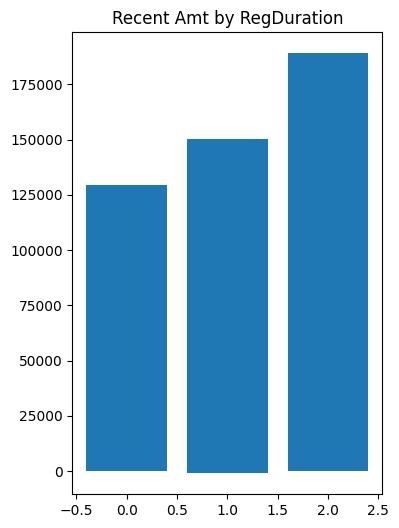

In [165]:
# 가입 연수에따른 최근 구매량

plt.figure(figsize = (4,6))
plt.bar(x = cust_churn['RegDuration'], height = cust_churn['Amt_3M_sum'])
plt.title('Recent Amt by RegDuration')
plt.show()

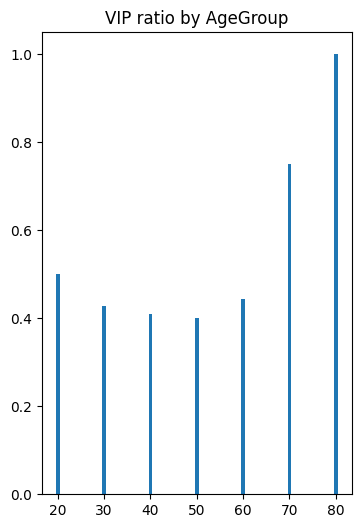

In [181]:
# 연령eo에따른 장기고객 전환율
cust_churn_chart = cust_churn.groupby('AgeGroup', as_index = False)['churn'].mean()
cust_churn_chart

plt.figure(figsize = (4,6))
plt.bar(x = cust_churn_chart['AgeGroup'], height = cust_churn_chart['churn'])
plt.title('VIP ratio by AgeGroup')
plt.show()

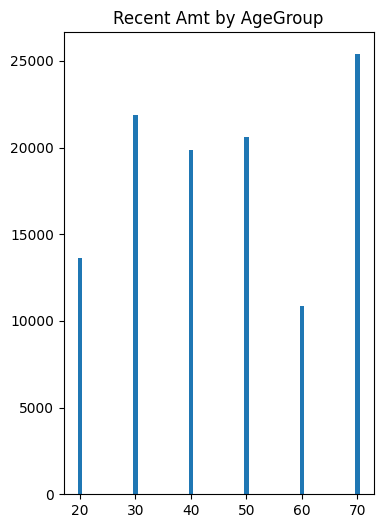

In [182]:
# 연령대에 따른 최근 구매금액
cust_churn_chart2 = cust_churn.groupby('AgeGroup', as_index = False)['Amt_3M_sum'].mean()
cust_churn_chart2

plt.figure(figsize = (4,6))
plt.bar(x = cust_churn_chart2['AgeGroup'], height = cust_churn_chart2['Amt_3M_sum'])
plt.title('Recent Amt by AgeGroup')
plt.show()